- https://www.youtube.com/watch?v=lzpDXNE1CZ8

## TITLE
- Comparative Analysis of Inflation with other Key Economic Indicators

In [3]:
from fredapi import Fred

fred_key = "8457ca797412934292967b9c62f8a7d4"
fred = Fred(api_key = fred_key)

In [4]:
# get the CPI Data
cpi = fred.get_series("CPIAUCSL")

In [5]:
cpi.index

DatetimeIndex(['1947-01-01', '1947-02-01', '1947-03-01', '1947-04-01',
               '1947-05-01', '1947-06-01', '1947-07-01', '1947-08-01',
               '1947-09-01', '1947-10-01',
               ...
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01'],
              dtype='datetime64[ns]', length=922, freq=None)

In [6]:
cpi

1947-01-01     21.480
1947-02-01     21.620
1947-03-01     22.000
1947-04-01     22.000
1947-05-01     21.950
               ...   
2023-06-01    303.841
2023-07-01    304.348
2023-08-01    306.269
2023-09-01    307.481
2023-10-01    307.619
Length: 922, dtype: float64

<Axes: title={'center': 'CPI'}>

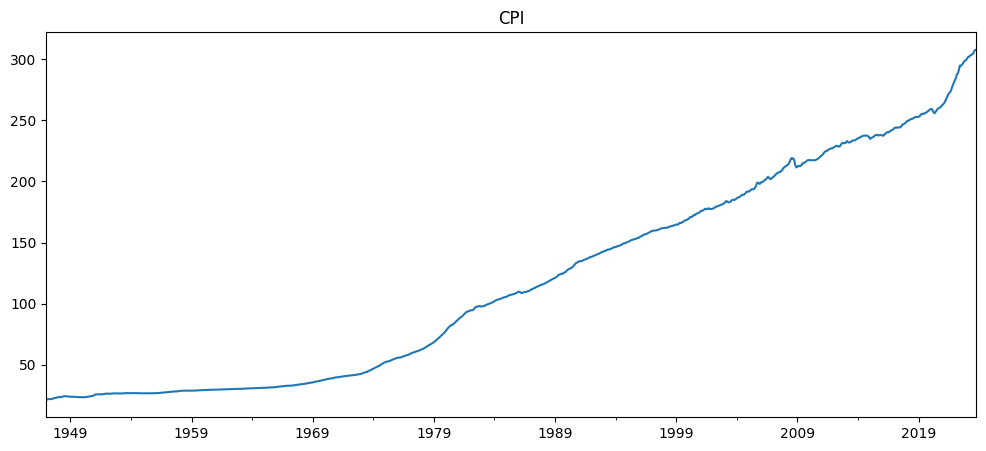

In [7]:
# plot the CPI Data
cpi.plot(figsize = (12,5), title = "CPI")

In [8]:
import pandas as pd

In [9]:
cpiDf = pd.DataFrame(cpi)

In [10]:
cpiDf.columns=["CPI"]

In [11]:
cpiDf

,CPI
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2023-06-01,303.841
2023-07-01,304.348
2023-08-01,306.269
2023-09-01,307.481


In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

import matplotlib.pyplot as plt

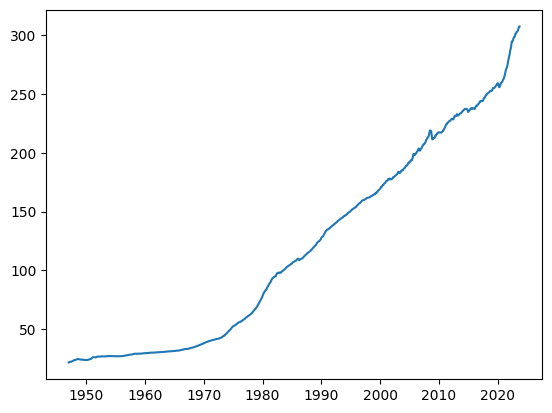

In [13]:
plt.plot(cpiDf["CPI"])

In [14]:
mul_result = seasonal_decompose(cpiDf["CPI"], model = 'multiplicative', period = 1)

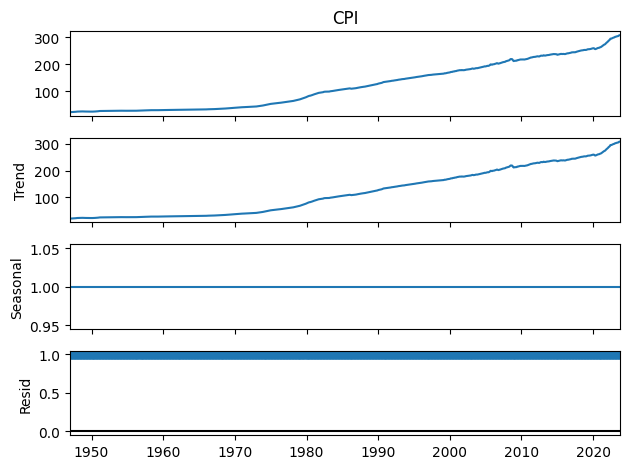

<Figure size 1500x800 with 0 Axes>

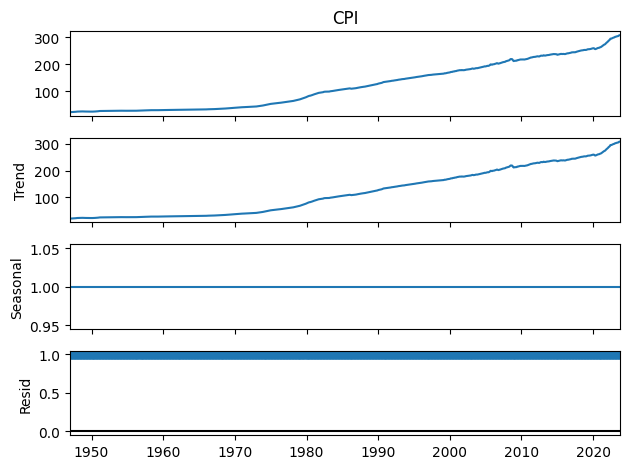

In [15]:
plt.figure(figsize = (15,8))
mul_result.plot()

In [16]:
add_result = seasonal_decompose(cpiDf["CPI"], model = 'additive', period = 1)

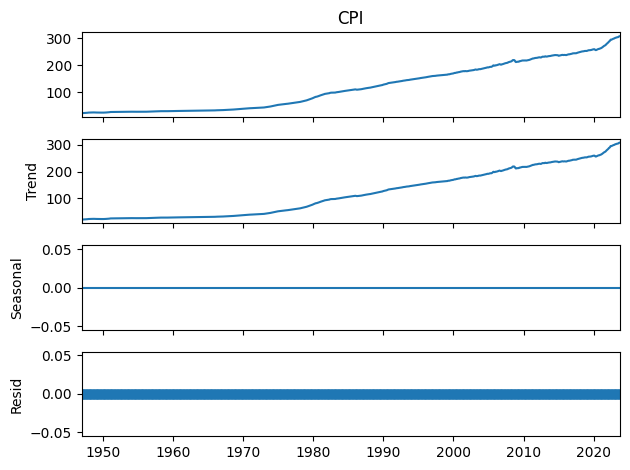

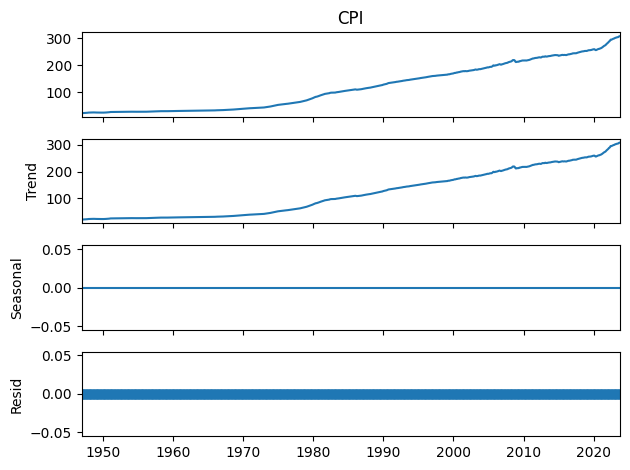

In [17]:
add_result.plot()

In [18]:
cpiAdd = pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis = 1)
cpiAdd.columns=['seasonality', 'trend', 'residual', 'actual_values']
cpiAdd.head()

,seasonality,trend,residual,actual_values
1947-01-01,0.0,21.48,0.0,21.48
1947-02-01,0.0,21.62,0.0,21.62
1947-03-01,0.0,22.00,0.0,22.00
1947-04-01,0.0,22.00,0.0,22.00
1947-05-01,0.0,21.95,0.0,21.95


In [19]:
cpiMul = pd.concat([mul_result.seasonal, mul_result.trend, mul_result.resid, mul_result.observed], axis = 1)
cpiMul.columns=['seasonality', 'trend', 'residual', 'actual_values']
cpiMul.head()

,seasonality,trend,residual,actual_values
1947-01-01,1.0,21.48,1.0,21.48
1947-02-01,1.0,21.62,1.0,21.62
1947-03-01,1.0,22.00,1.0,22.00
1947-04-01,1.0,22.00,1.0,22.00
1947-05-01,1.0,21.95,1.0,21.95


### AD Fuller Test for Stationarity
- Stationarity - Constant Mean and Variance

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
# Null Hypothesis :  non Stationary
# if p- value less than 5%, reject Null Hypothesis
adfuller_result = adfuller(cpiDf.CPI.values, autolag = "AIC")

print (f'ADF Statistic: {adfuller_result{0}}')

print (f'p-value: {adfuller_result{1}}')

SyntaxError: f-string: invalid syntax. Perhaps you forgot a comma? (3904585740.py, line 5)

### Factors Influencing Inflation
- Correlation and Causation Analysis

1. Collecting the data on other key Economic Indicators:

In [23]:
start = '1980-01-01'
end = '2023-09-01'

cpiDf = pd.DataFrame(fred.get_series(
    'CPIAUCSL',
    observation_start=start,
    observation_end=end)).resample("M").mean()

monthyl_yield_curve = pd.DataFrame(fred.get_series(
    'T10Y2Y',
    observation_start=start,
    observation_end=end)).resample("M").mean()

fed_funds_rate = pd.DataFrame(fred.get_series(
    'FEDFUNDS',
    observation_start=start,
    observation_end=end)).resample("M").mean()

unemployment_rate = pd.DataFrame(fred.get_series(
    'UNRATE',
    observation_start=start,
    observation_end=end)).resample("M").mean()

nasdaq_Comp = pd.DataFrame(fred.get_series(
    'NASDAQCOM',
    observation_start=start,
    observation_end=end)).resample("M").mean()
m2 = pd.DataFrame(fred.get_series(
    'M2REAL',
    observation_start=start,
    observation_end=end)).resample("M").mean()

In [24]:
cpiDf.shape

(525, 1)

In [25]:
print(nasdaq_Comp.shape)
print(m2.shape)
print(unemployment_rate.shape)

(525, 1)
(525, 1)
(525, 1)


In [26]:

dfCausal = pd.concat([cpiDf,monthyl_yield_curve,fed_funds_rate,unemployment_rate,nasdaq_Comp,m2],axis=1)
dfCausal.columns = ['CPI', 'Yield_Curve','Fed_Funds','Unemp_Rate','Nasdaq Comp','m2']

In [27]:
dfCausal
# Fix the dates

,CPI,Yield_Curve,Fed_Funds,Unemp_Rate,Nasdaq Comp,m2
1980-01-31,78.000,-0.695909,13.82,6.3,155.140909,1900.9
1980-02-29,79.000,-1.003684,14.13,6.3,161.644000,1891.9
1980-03-31,80.100,-2.135714,17.19,6.3,141.100476,1872.4
1980-04-30,80.900,-1.028571,17.61,6.9,136.286667,1856.9
1980-05-31,81.700,0.731429,10.98,7.5,145.684762,1851.0
...,...,...,...,...,...,...
2023-05-31,303.294,-0.558182,5.06,3.7,12446.530455,6864.8
2023-06-30,303.841,-0.891429,5.08,3.6,13463.777619,6863.6
2023-07-31,304.348,-0.929000,5.12,3.5,14033.091000,6855.2
2023-08-31,306.269,-0.733913,5.33,3.8,13743.213043,6799.7


In [28]:
dfCausal.shape

(525, 6)

- Correlation

- https://chat.openai.com/c/663a729a-82a7-43d2-b06d-efc54b19a08a

In [29]:
corr1 = dfCausal.corr()
print (corr1)

                  CPI  Yield_Curve  Fed_Funds  Unemp_Rate  Nasdaq Comp   
CPI          1.000000     0.148808  -0.797802   -0.336808     0.830212  \
Yield_Curve  0.148808     1.000000  -0.617488    0.435938    -0.148924   
Fed_Funds   -0.797802    -0.617488   1.000000    0.118685    -0.491558   
Unemp_Rate  -0.336808     0.435938   0.118685    1.000000    -0.372485   
Nasdaq Comp  0.830212    -0.148924  -0.491558   -0.372485     1.000000   
m2           0.923596     0.038391  -0.656609   -0.273052     0.944771   

                   m2  
CPI          0.923596  
Yield_Curve  0.038391  
Fed_Funds   -0.656609  
Unemp_Rate  -0.273052  
Nasdaq Comp  0.944771  
m2           1.000000  


<Axes: >

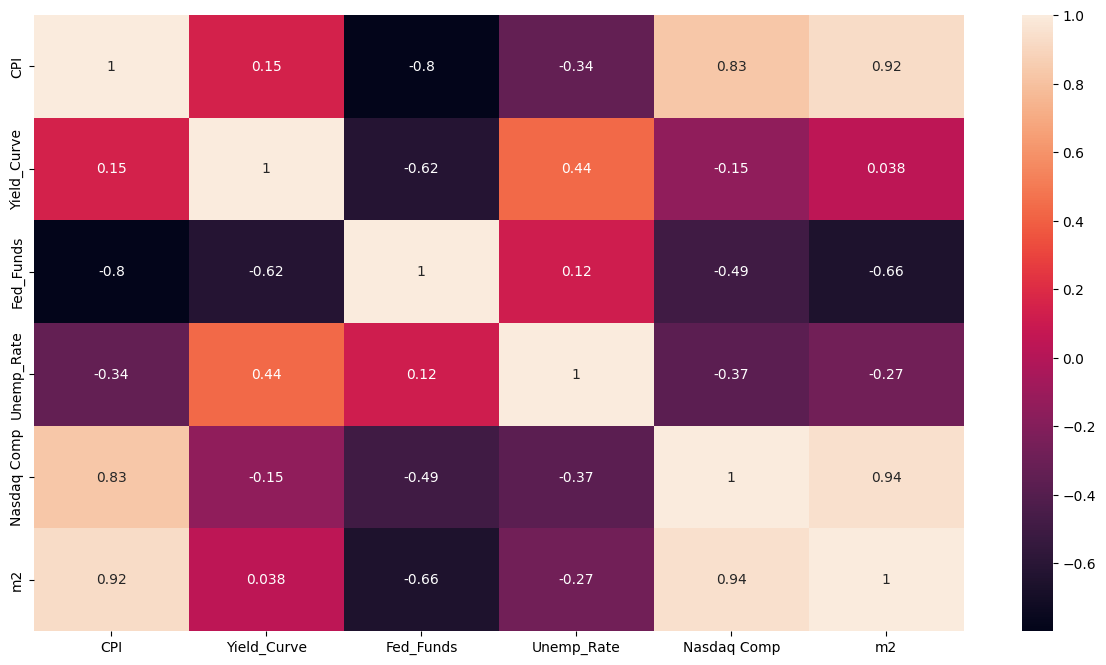

In [30]:
import seaborn as sns
plt.figure(figsize = (15,8))

sns.heatmap(dfCausal.corr(), annot = True)

- INSIGHTS
- CPI is highly positively correlated with NAsdaq Comp and m2
- CPI is moderatley negatively correlated with federal funds rate

In [ ]:
# NEXT
# Fix the dates before concatenating (done)
# then, check the correlation again(done)
# Visualize the correlation  (done)
# Then do the causality test (below)

- Causality Tests

- https://towardsdatascience.com/a-quick-introduction-on-granger-causality-testing-for-time-series-analysis-7113dc9420d2

In [31]:
from statsmodels.tsa.stattools import grangercausalitytests

In [40]:
dfCausal2= dfCausal[["CPI", "Nasdaq Comp"]]
# We are checking if CPI is Granger caused by Nasdaq Comp
# CPI is the "Dependent Time Series"
# Nasdaq Comp is the "Cause Time Series"

- Null Hypothesis (H0): The null hypothesis in the Granger causality test is that past values of the potential "cause time series" do not have any predictive power in explaining the current values of the "dependent time series". In other words, the past values of the potential cause time series do not Granger-cause the dependent time series.

- Alternative Hypothesis (H1): The alternative hypothesis is that past values of the potential cause time series do have predictive power and are Granger-causal for the dependent time series.

- For each lag, check the p value
    - If the p value is below a signifucance level (say, 0.05, then reject the null hypothesis and conclude that the "Casue time series" Granger-causes the dependent time series)
    - Else, if the p value is above the significance level, then can't reject the null hypothesis, hence no evidence that there is Granger Causality.

-   What is a lag? In the context of time series analysis, a "lag" refers to the number of time units by which a series is shifted

In [41]:
grangercausalitytests(dfCausal2,4, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=90.4409 , p=0.0000  , df_denom=521, df_num=1
ssr based chi2 test:   chi2=90.9617 , p=0.0000  , df=1
likelihood ratio test: chi2=83.8758 , p=0.0000  , df=1
parameter F test:         F=90.4409 , p=0.0000  , df_denom=521, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=16.4127 , p=0.0000  , df_denom=518, df_num=2
ssr based chi2 test:   chi2=33.1423 , p=0.0000  , df=2
likelihood ratio test: chi2=32.1345 , p=0.0000  , df=2
parameter F test:         F=16.4127 , p=0.0000  , df_denom=518, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=13.2258 , p=0.0000  , df_denom=515, df_num=3
ssr based chi2 test:   chi2=40.2168 , p=0.0000  , df=3
likelihood ratio test: chi2=38.7428 , p=0.0000  , df=3
parameter F test:         F=13.2258 , p=0.0000  , df_denom=515, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=9.7081  , p=0.0000  

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{1: ({'ssr_ftest': (90.4409141621984, 6.990838571990801e-20, 521.0, 1),
   'ssr_chi2test': (90.96168718040684, 1.4648108285353725e-21, 1),
   'lrtest': (83.87578096129971, 5.268603028944866e-20, 1),
   'params_ftest': (90.44091416214107, 6.990838572163216e-20, 521.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (16.412710415716862, 1.2268409632091973e-07, 518.0, 2),
   'ssr_chi2test': (33.14226852285684, 6.356935887242719e-08, 2),
   'lrtest': (32.13451959639622, 1.0521501715611893e-07, 2),
   'params_ftest': (16.412710415775344, 1.2268409631417105e-07, 518.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (13.225822288075426, 2.4898549982946847e-08, 515.0, 3),
   'ssr_chi2test': (40.21677223907984, 9.585277593356466e-09, 3),
   'lrtest': (38.74278955901684, 1.9676615916056287e-08, 3),
   'params_ftest': (13.22582228756265, 2.4898550000302016e-08, 515.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1.,

### Interpretation
- For all the 4 lags,  the p-value is less than the significance value of 0.05. Hence it can be concluded that the "Cause time series" (Nasdaq Comp) Granger-causes the "Dependent Time Series" (CPI)

---


#### OTHERS

In [38]:
dfCausal3= dfCausal[["Yield_Curve", "Nasdaq Comp"]]

In [39]:
grangercausalitytests(dfCausal3,4, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8820  , p=0.0902  , df_denom=521, df_num=1
ssr based chi2 test:   chi2=2.8986  , p=0.0887  , df=1
likelihood ratio test: chi2=2.8906  , p=0.0891  , df=1
parameter F test:         F=2.8820  , p=0.0902  , df_denom=521, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6385  , p=0.1953  , df_denom=518, df_num=2
ssr based chi2 test:   chi2=3.3087  , p=0.1912  , df=2
likelihood ratio test: chi2=3.2983  , p=0.1922  , df=2
parameter F test:         F=1.6385  , p=0.1953  , df_denom=518, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4289  , p=0.0646  , df_denom=515, df_num=3
ssr based chi2 test:   chi2=7.3858  , p=0.0606  , df=3
likelihood ratio test: chi2=7.3341  , p=0.0620  , df=3
parameter F test:         F=2.4289  , p=0.0646  , df_denom=515, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3646  , p=0.2451  

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{1: ({'ssr_ftest': (2.881956323838039, 0.0901742965262724, 521.0, 1),
   'ssr_chi2test': (2.898551081940753, 0.08865921242906101, 1),
   'lrtest': (2.89056373120593, 0.08909974413841767, 1),
   'params_ftest': (2.8819563238435175, 0.0901742965259721, 521.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.6385353966005487, 0.19526959338935873, 518.0, 2),
   'ssr_chi2test': (3.308702750664429, 0.1912160429328531, 2),
   'lrtest': (3.298280609465337, 0.19221508400836324, 2),
   'params_ftest': (1.6385353966870344, 0.19526959337257385, 518.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.428923468482259, 0.06455117225815357, 515.0, 3),
   'ssr_chi2test': (7.385813886685859, 0.06056612078444742, 3),
   'lrtest': (7.334050391224537, 0.06197927712869906, 3),
   'params_ftest': (2.4289234683138425, 0.06455117227247387, 515.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 